# 퍼셉트론


- max_iter : 최적화를 위한 반복 횟수
- eta0 : 학습속도
- n_iter_no_chance : 이 설정값만큼 반복을 해도 성능이 나아지지 않는다면 max_iter와 관련없이 멈춘다.

In [6]:
warnings.simplefilter('ignore')

In [23]:
from ipywidgets import widgets
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, :2]
y = (iris.target[idx] / 2).astype(np.int)


def plot_perceptron(n):
    model = Perceptron(max_iter=300, shuffle=False,
                       tol=0, n_iter_no_change=1e9).fit(X, y)
    XX_min = X[:, 0].min()-1
    XX_max = X[:, 0].max()+1
    YY_min = X[:, 1].min() - 1
    YY_max = X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                         np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='w', s=100,
                marker='o', edgecolor='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='k', s=100,
                marker='x', edgecolor='k')
    plt.xlabel('꽃받침의 길이')
    plt.ylabel('꽃받침의 폭')
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()


plt.rcParams['font.family'] = 'NanumGothic'
widgets.interact(plot_perceptron, n=widgets.IntSlider(
    min=1, max=100, step=1, value=1))

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

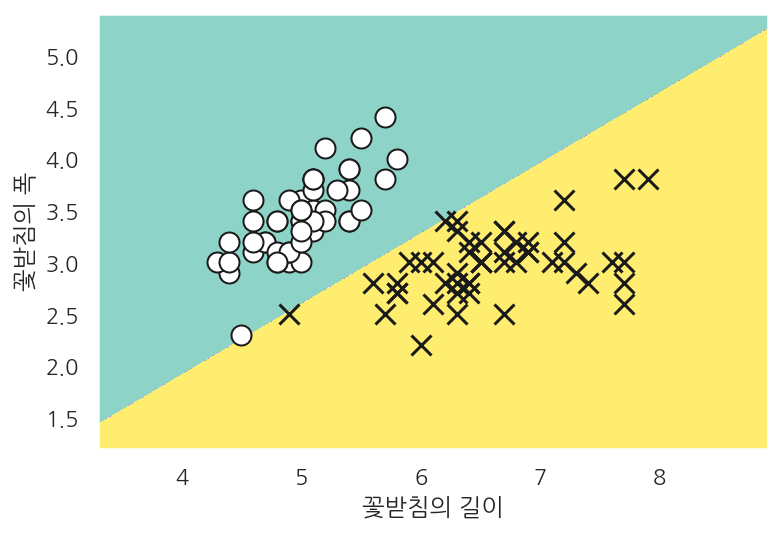

In [24]:
plot_perceptron(300)

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
model = Perceptron(max_iter=400, shuffle=False, tol=0,
                   n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]], dtype=int64)

# 학습 성능

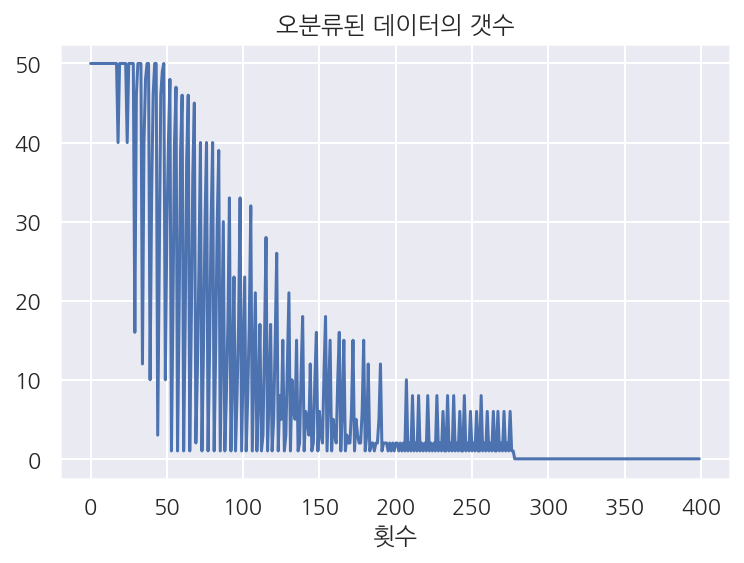

In [13]:
n = 400
loss = np.zeros(n)
model = Perceptron(warm_start=True, shuffle=False)
for i in range(n):
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))
plt.plot(loss)
plt.xlabel('횟수')
plt.title('오분류된 데이터의 갯수')
plt.show()

# SGD


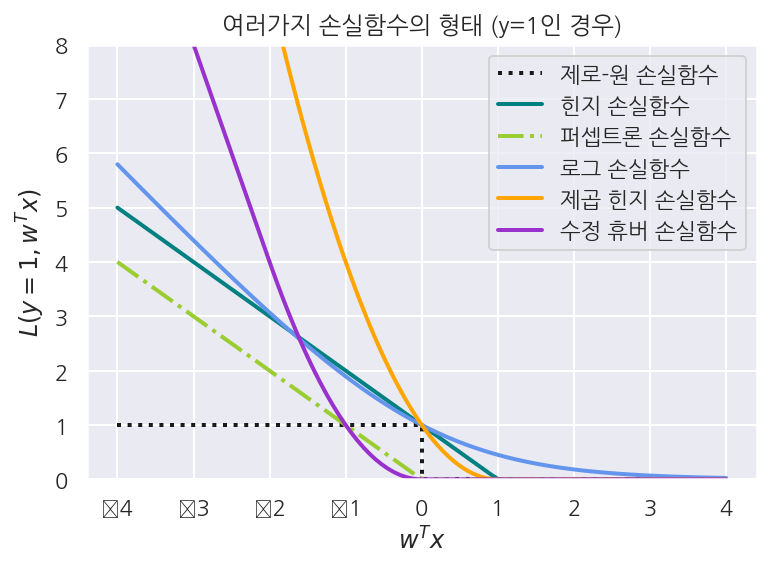

In [21]:
def modified_huber_loss(y_true, y_pred):
    z = y_pred + y_true
    loss = -4 * z
    loss[z >= -1] = (1-z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0],
         color='k', lw=2, ls=':', label='제로-원 손실함수')
plt.plot(xx, np.where(xx < 1, 1-xx, 0),
         color='teal', lw=2, ls='-', label='힌지 손실함수')
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen',
         lw=2, ls='-.', label='퍼셉트론 손실함수')
plt.plot(xx, np.log2(1+np.exp(-xx)),
         color='cornflowerblue', lw=2, label='로그 손실함수')
plt.plot(xx, np.where(xx < 1, 1-xx, 0)**2,
         color='orange', lw=2, label='제곱 힌지 손실함수')
plt.plot(xx, modified_huber_loss(xx, 1),
         color='darkorchid', lw=2, label='수정 휴버 손실함수')

plt.ylim((0, 8))
plt.xlabel(r'$w^Tx$')
plt.ylabel(r'$L(y=1, w^Tx)$')
plt.title('여러가지 손실함수의 형태 (y=1인 경우)')
plt.legend()
plt.show()

## 사이킷런으로 sgd 구현

- loss : hinge, perceptron, huber, log, modified_huber, squared_hinge 등
    - 보통 modified_huber 사용

In [22]:
from ipywidgets import widgets
from sklearn.linear_model import SGDClassifier


def plot_sgd(n):
    model = SGDClassifier(loss='modified_huber', max_iter=n,
                          shuffle=False, n_iter_no_change=1e9).fit(X, y)
    XX_min = X[:, 0].min()-1
    XX_max = X[:, 0].max()+1
    YY_min = X[:, 1].min() - 1
    YY_max = X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                         np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='w', s=100,
                marker='o', edgecolor='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='k', s=100,
                marker='x', edgecolor='k')
    plt.xlabel('꽃받침의 길이')
    plt.ylabel('꽃받침의 폭')
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()


widgets.interact(plot_sgd, n=widgets.IntSlider(
    min=1, max=100, step=1, value=1))

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

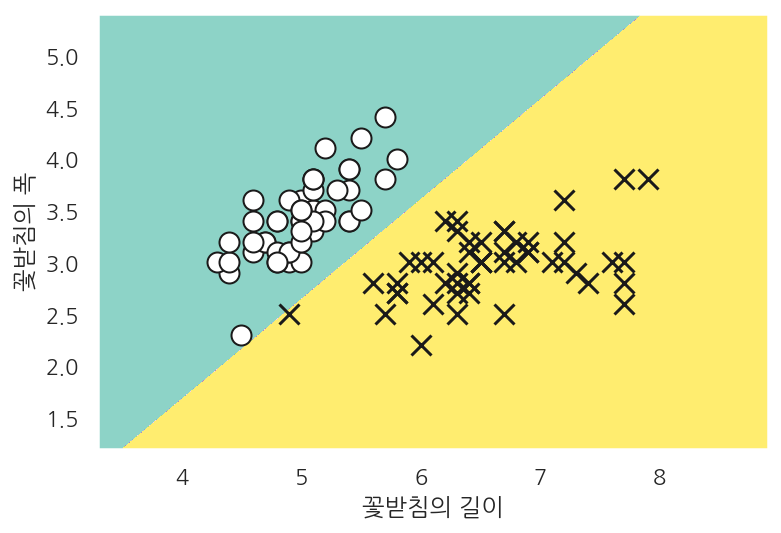

In [25]:
plot_sgd(400)

In [26]:
mode = SGDClassifier(loss='modified_huber', max_iter=400,
                     shuffle=False, n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]], dtype=int64)

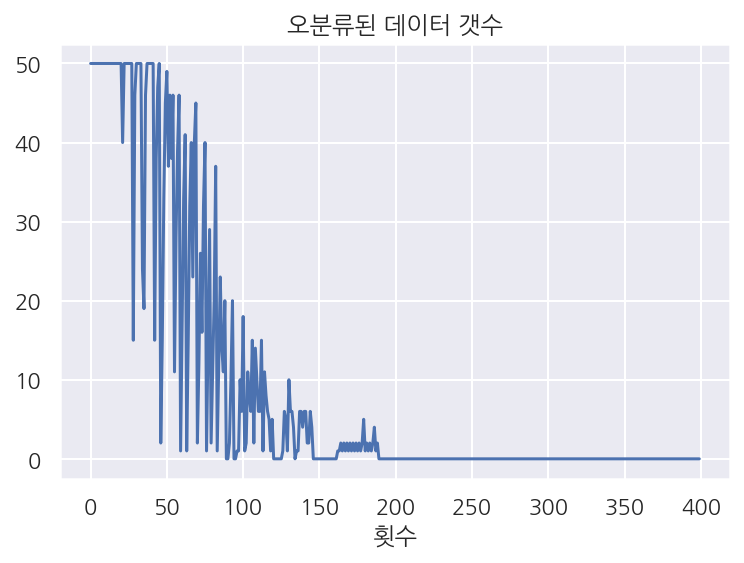

In [29]:
n = 400
loss = np.empty(n)
model = SGDClassifier(loss='modified_huber', shuffle=False)
for i in range(n):
    model.partial_fit(X,y,classes=[0,1])
    loss[i] = np.sum(y != model.predict(X))
    
plt.plot(loss)
plt.xlabel('횟수')
plt.title('오분류된 데이터 갯수')
plt.show()